In [1]:
import matplotlib.pyplot as plt
import numpy as np

from discretization import Discretization

In [ ]:
nd=100
dirs = np.array([(np.cos(angle), np.sin(angle))
                              for angle in np.linspace(-np.pi/2, np.pi/2, nd)])
#print(dirs)
std_grid1 = np.linspace(0, 1, 20)
std_grid = np.array(list(itertools.product(std_grid1, std_grid1)))
rot45 = 0.5*np.array([[1, 1], [-1, 1]])
rot_grid = std_grid@rot45.transpose()
res = np.empty((nd, len(std_grid), 2))
for di, d in enumerate(dirs):
    if d[1]>0:
        res[di] = rot_grid*np.sum(d)
    else:
        res[di] = rot_grid*(d[0]-d[1]) + (d[1],0)
    plt.scatter(res[di,:,0], res[di,:,1])
    #print(np.min(res[di,:,0]), np.max(res[di,:,0]), np.min(res[di,:,1]), np.max(res[di,:,1]))
    
plt.show()

In [6]:
disc = Discretization(
    tau=1,
    K=1,
    num_rads=0,
    num_extra_ns=10,
    grid_size_nu=2,
    grid_size_mu=2,
    num_dirs=10
)

In [3]:
grids = disc.adapted_mu_grids()

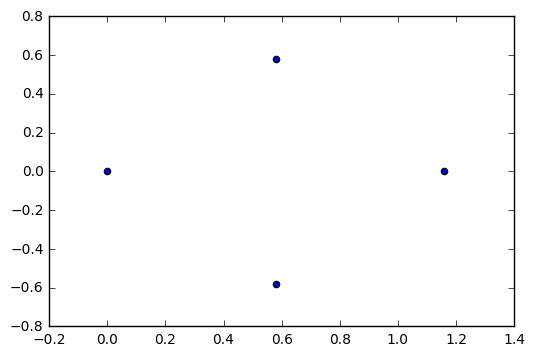

In [4]:
di = 5
plt.scatter(grids[di,:,0], grids[di,:,1])
plt.show()

In [27]:
disc.dirs[9]

array([6.123234e-17, 1.000000e+00])

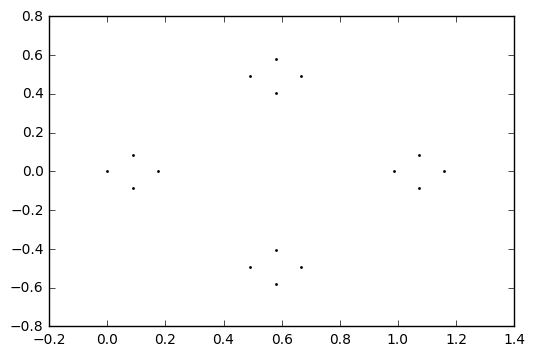

In [5]:
stddir = 5
proj_std = []
for g1 in grids[9]:
    for g2 in grids[9]:
        proj_std.append((
            disc.dirs[stddir]@(g1[0], g2[0]),
            disc.dirs[stddir]@(g1[1], g2[1]))
        )
proj_std = np.array(proj_std)
plt.scatter(proj_std[:,0], proj_std[:,1], s=1)
plt.show()

In [7]:
nugr = disc.adapted_nu_grids()

[ 6.123234e-17 -1.000000e+00]


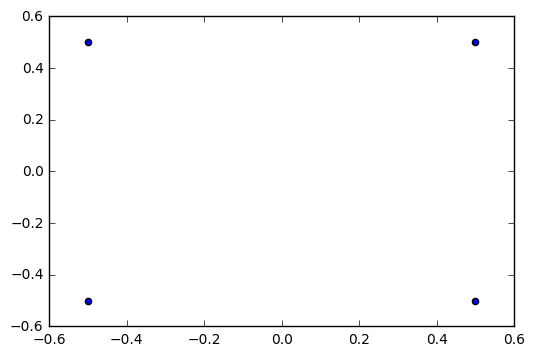

In [10]:
di = 0
print(disc.ns[di])
plt.scatter(nugr[di,:,0], nugr[di,:,1])
plt.show()